# Creazione modello per previsione SQUAT

> Logistic Regression 

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss, precision_score, recall_score
from sklearn import tree
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [40]:
shift = 3
#rolling_periods = 3

## Import dati

In [41]:
# Scelta automatica del Path locale tra "paoloartasensi" o "lorenzobassetti"
path = '/Users/paoloartasensi/Python_Scripts/'
isdir = os.path.isdir(path)
if isdir == True:
    path = '/Users/paoloartasensi/Python_Scripts/'
else:
    path = '/Users/lorenzobassetti/Dropbox/Quant/Python_DEV/'

print(isdir)

True


In [42]:

df = pd.read_csv(path+'artabax/artbax_csv/squat_20221219_0413PM.csv')


df.reset_index(drop=True, inplace=True)

##bar_zero = df['BAR'][0]
#df['BAR'] = (df['BAR']/bar_zero)
df.set_index('Time', inplace=True)
df

,Ax,Ay,Az,Gx,Gy,Gz,BAR,P,R,UP,DOWN,prob
Time,,,,,,,,,,,,
1671462680372,9.1154,1.6861,4.4428,0.21,2.17,-0.63,1.0,0.0,0.0,0,0,0
1671462680502,9.0436,1.6693,4.3541,1.47,2.59,-0.28,1.0,0.0,0.0,0,0,0
1671462680633,9.0125,1.6837,4.3062,0.56,-2.17,0.98,1.0,0.0,0.0,0,0,0
1671462680761,9.0292,1.7364,4.3398,-3.36,-0.35,0.98,1.0,0.0,0.0,0,0,0
1671462680897,9.0891,1.6358,4.4547,3.78,-3.01,0.77,1.0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1671462796607,9.5753,1.6741,3.6764,2.80,-8.12,0.98,1.0,0.0,0.0,0,0,0
1671462796721,9.3765,1.6813,3.4776,5.39,-2.66,1.19,1.0,0.0,0.0,0,0,0
1671462796833,9.0771,1.8226,3.1782,2.38,0.91,0.70,1.0,0.0,0.0,0,0,0


In [43]:
# applico uno shift per ogni posizione i con ['DOWN']==1, 
# assegno alle righe prima e dopo ['DOWN']=1
# numero di righe determinato da [shift]

df_temp = df.loc[df['DOWN'] ==1]
pos = np.array(df_temp.index)
for i in pos:
     for k in range(-shift+1, shift, 1):
         df.at[i+k, 'DOWN'] =1

df.dropna(inplace=True)

In [44]:
df = df.copy()
df.dropna(inplace=True)
df

,Ax,Ay,Az,Gx,Gy,Gz,BAR,P,R,UP,DOWN,prob
Time,,,,,,,,,,,,
1671462680372,9.1154,1.6861,4.4428,0.21,2.17,-0.63,1.0,0.0,0.0,0.0,0.0,0.0
1671462680502,9.0436,1.6693,4.3541,1.47,2.59,-0.28,1.0,0.0,0.0,0.0,0.0,0.0
1671462680633,9.0125,1.6837,4.3062,0.56,-2.17,0.98,1.0,0.0,0.0,0.0,0.0,0.0
1671462680761,9.0292,1.7364,4.3398,-3.36,-0.35,0.98,1.0,0.0,0.0,0.0,0.0,0.0
1671462680897,9.0891,1.6358,4.4547,3.78,-3.01,0.77,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1671462796607,9.5753,1.6741,3.6764,2.80,-8.12,0.98,1.0,0.0,0.0,0.0,0.0,0.0
1671462796721,9.3765,1.6813,3.4776,5.39,-2.66,1.19,1.0,0.0,0.0,0.0,0.0,0.0
1671462796833,9.0771,1.8226,3.1782,2.38,0.91,0.70,1.0,0.0,0.0,0.0,0.0,0.0


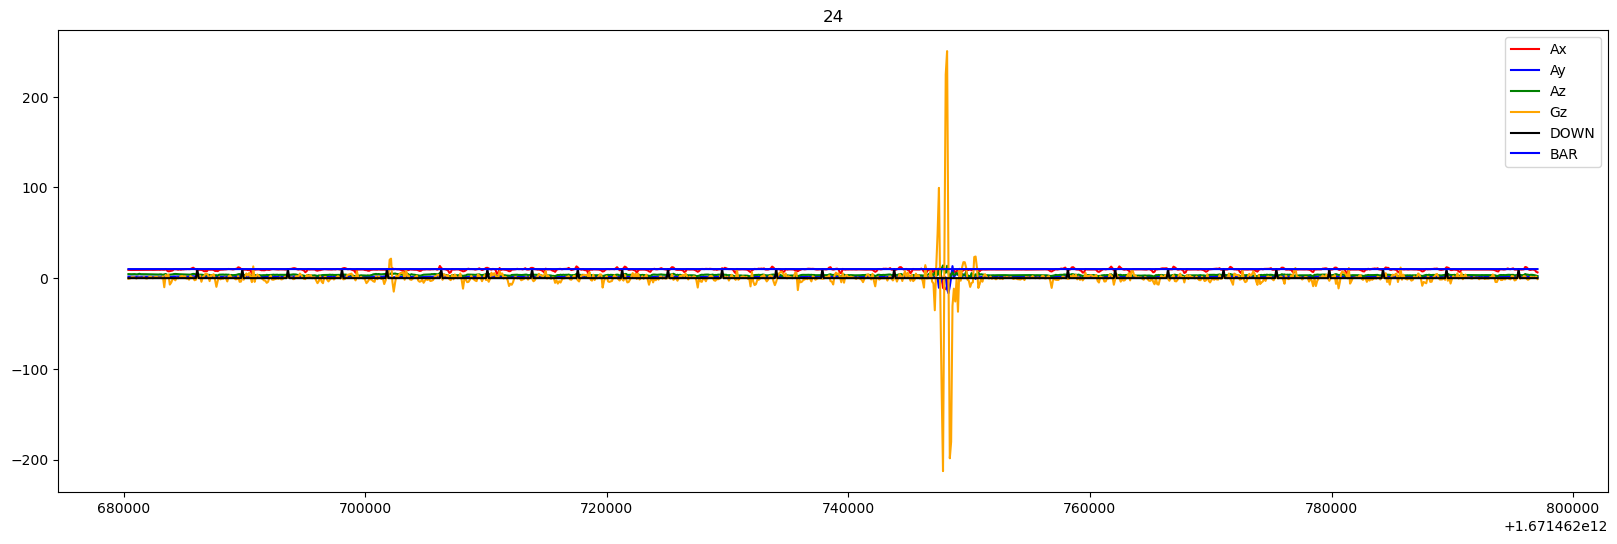

In [45]:
plt.figure(figsize=(20,6))
plt.plot(df['Ax'], color='red', label='Ax')
plt.plot(df['Ay'], color='blue', label='Ay')
plt.plot(df['Az'], color='green', label='Az')
plt.plot(df['Gz'], color='orange', label='Gz')
plt.plot(df['DOWN']*10, color='black', label='DOWN')
plt.plot(df['BAR']*10, color='blue', label='BAR')
plt.legend()
count = df['DOWN'].value_counts()[1]
plt.title(count)
plt.show()

## Preparazione datasets

In [46]:
## Y è l'output che utilizziamo come training
## X sono le feautures, BISOGNA togliere la Y dalle colonne feautures 
y = df['DOWN']
X = df.copy()
X.drop(columns=['DOWN','UP',], axis=1, inplace=True)

##Divido il campione in Train e Test
X_train, X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=None)

df.head()

,Ax,Ay,Az,Gx,Gy,Gz,BAR,P,R,UP,DOWN,prob
Time,,,,,,,,,,,,
1671462680372,9.1154,1.6861,4.4428,0.21,2.17,-0.63,1.0,0.0,0.0,0.0,0.0,0.0
1671462680502,9.0436,1.6693,4.3541,1.47,2.59,-0.28,1.0,0.0,0.0,0.0,0.0,0.0
1671462680633,9.0125,1.6837,4.3062,0.56,-2.17,0.98,1.0,0.0,0.0,0.0,0.0,0.0
1671462680761,9.0292,1.7364,4.3398,-3.36,-0.35,0.98,1.0,0.0,0.0,0.0,0.0,0.0
1671462680897,9.0891,1.6358,4.4547,3.78,-3.01,0.77,1.0,0.0,0.0,0.0,0.0,0.0


## Logistic Regression

In [47]:
log_reg = LogisticRegression(random_state=None, solver = 'lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)

# predict - Predict class labels for samples in X
y_pred = log_reg.predict(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

lr = pd.DataFrame(data =[X_train.columns, np.array(log_reg.coef_[0]).tolist()]).T
lr.rename(columns={0:'Reg',1:'Logistic'}, inplace=True)
lr.set_index('Reg', inplace=True)
lr.sort_values(by='Logistic', key=abs, ascending=False , inplace=True)
print(lr)
print('b0:',log_reg.intercept_[0])

      Logistic
Reg           
Ay    0.438131
Ax    0.435943
Az   -0.207708
Gx   -0.024554
Gy    0.018329
Gz    0.001181
BAR   0.000103
P          0.0
R          0.0
prob       0.0
b0: -7.844364395297495


LogReg Training Accuracy is:  0.9735576923076923
LogReg Testing Accuracy is:  0.9856459330143541


/var/folders/3c/slz2lm7j261c98fw2gd6wrz00000gp/T/ipykernel_47559/4034945019.py:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(y_pred , label='Valori stimati')


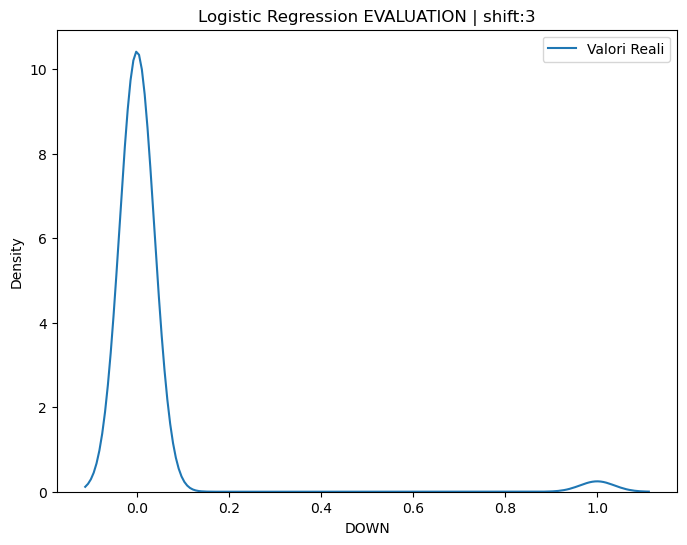

In [48]:
'''Logistic Regression EVALUATION'''

# Accuracy on Train
print("LogReg Training Accuracy is: ", log_reg.score(X_train, y_train))
# Accuracy on Test
print("LogReg Testing Accuracy is: ", log_reg.score(X_test, y_test))
# Classification Report

plt.figure(figsize=(8, 6))
plt.title('Logistic Regression EVALUATION' +' | shift:'+str(shift))
sns.kdeplot(data=df, x='DOWN' , label='Valori Reali')
sns.kdeplot(y_pred , label='Valori stimati')
plt.legend()
plt.show()


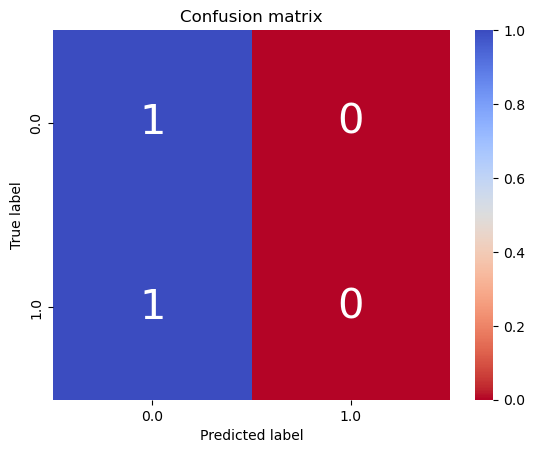

In [49]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="coolwarm_r", 
                    xticklabels=classes, 
                    yticklabels=classes, 
                    vmin=0., vmax=1., 
                    annot=True, annot_kws={'size':30}
                    )
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Visualizing cm

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In [50]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP / (TP + FN)
print("The True Positive Rate is:", TPR)

# Precision or positive predictive value
PPV = TP / (TP + FP)
print("The Precision is:", PPV)

# False positive rate or False alarm rate
FPR = FP / (FP + TN)
print("The False positive rate is:", FPR)


# False negative rate or Miss Rate
FNR = FN / (FN + TP)
print("The False Negative Rate is: ", FNR)

The True Positive Rate is: [1. 0.]
The Precision is: [0.97355769        nan]
The False positive rate is: [1. 0.]
The False Negative Rate is:  [0. 1.]


/var/folders/3c/slz2lm7j261c98fw2gd6wrz00000gp/T/ipykernel_47559/2499306925.py:12: RuntimeWarning: invalid value encountered in divide
  PPV = TP / (TP + FP)


In [51]:
# Running Log loss on training
pred_proba_train = log_reg.predict_proba(X_train)
print("The Log Loss on Training is: ", log_loss(y_train, pred_proba_train))

# Running Log loss on testing
pred_proba_test = log_reg.predict_proba(X_test)
print("The Log Loss on Test is: ", log_loss(y_test, pred_proba_test))

The Log Loss on Training is:  0.1179841367850351
The Log Loss on Test is:  0.07239265868735663


In [52]:
# Looping over the parameters
hyper_size = 20

C_List = np.geomspace(1e-5, 1e5, num=hyper_size)
CA = [] #classification accuracy
Logarithmic_Loss = [] #log ross

for c in C_List:
    log_reg2 = LogisticRegression(random_state=10, solver = 'lbfgs', C=c)
    log_reg2.fit(X_train, y_train)
    score = log_reg2.score(X_test, y_test)
    CA.append(score)
    # print("The CA of C parameter {} is {}:".format(c, score))
    pred_proba_test = log_reg2.predict_proba(X_test)
    log_loss2 = log_loss(y_test, pred_proba_test)
    Logarithmic_Loss.append(log_loss2)
    # print("The Logg Loss of C parameter {} is {}:".format(c, log_loss2))
    # print("")
    
#putting the outcomes in a Table

# reshaping
CA2 = np.array(CA).reshape(hyper_size,)
Logarithmic_Loss2 = np.array(Logarithmic_Loss).reshape(hyper_size,)

# zip
outcomes = zip(C_List, CA2, Logarithmic_Loss2)

#df
df_outcomes = pd.DataFrame(outcomes, columns = ["C_List", 'CA2','Logarithmic_Loss2'])

#print
df_outcomes

# Ordering the data (sort_values)
df_outcomes.sort_values("Logarithmic_Loss2", ascending = True).reset_index()

,index,C_List,CA2,Logarithmic_Loss2
0,2,0.000113,0.990431,0.061280
1,1,0.000034,0.990431,0.061283
2,0,0.000010,0.990431,0.061296
3,3,0.000379,0.990431,0.061351
4,4,0.001274,0.990431,0.061541
5,5,0.004281,0.990431,0.061892
6,6,0.014384,0.990431,0.062403
7,7,0.048329,0.990431,0.063038
8,8,0.162378,0.985646,0.065302
9,9,0.545559,0.985646,0.070007


In [53]:
# Another way of doing the above
# Scikit-learn offers a LogisticRegressionCV module which implements Logistic Regression 
# with builtin cross-validation to find out the optimal C parameter
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, random_state=None, shuffle=True)

Log_reg4 = LogisticRegressionCV(random_state=5, Cs = C_List, solver ='lbfgs', cv=kf)
Log_reg4.fit(X_train, y_train)
print("The CA is:", Log_reg4.score(X_test, y_test))
pred_proba_t = Log_reg4.predict_proba(X_test)
log_loss4 = log_loss(y_test, pred_proba_t)
print("The Logistic Loss is: ", log_loss4)
print("The optimal C parameter is: ", Log_reg4.C_)

The CA is: 0.9904306220095693
The Logistic Loss is:  0.061272552942534586
The optimal C parameter is:  [1.e-05]
